<a href="https://colab.research.google.com/github/electrojam/Curso-de-Regresion-Logistica-con-Python-y-scikit-learn/blob/main/Cancer_de_seno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerias

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Carga de datos

In [2]:
df_data = pd.read_csv('data.csv')

In [3]:
df_data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

# Limpieza de datos

In [4]:
# Observamos información del df

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Observamos si tiene valores null las variables

df_data.isnull().sum()

# Solamente la variable Unnamed tiene valores nulos = 569

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# eliminamos variable o columna Unnamed debido a que todos sus valores son nulos
# También eliminamos la variable o columna id porque no nos interesa

df_data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [7]:
df_data.shape

(569, 31)

In [8]:
df_data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [9]:
# Revisamos qué valores y cuantos tiene variable categórica diagnosis

print(df_data['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [10]:
# Convertimos a numérico variable objetivo diagnosis

df_data['diagnosis'].replace(to_replace='M', value=1, inplace=True)
df_data['diagnosis'].replace(to_replace='B', value=0, inplace=True)


In [11]:
# Observamos solamente variable diagnosis

df_data['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [12]:
# Guardamos resultado en nuevo df

df_data_processing = df_data.copy()

In [13]:
df_data_processing

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

# Análisis de correlación entre variables




<Axes: >

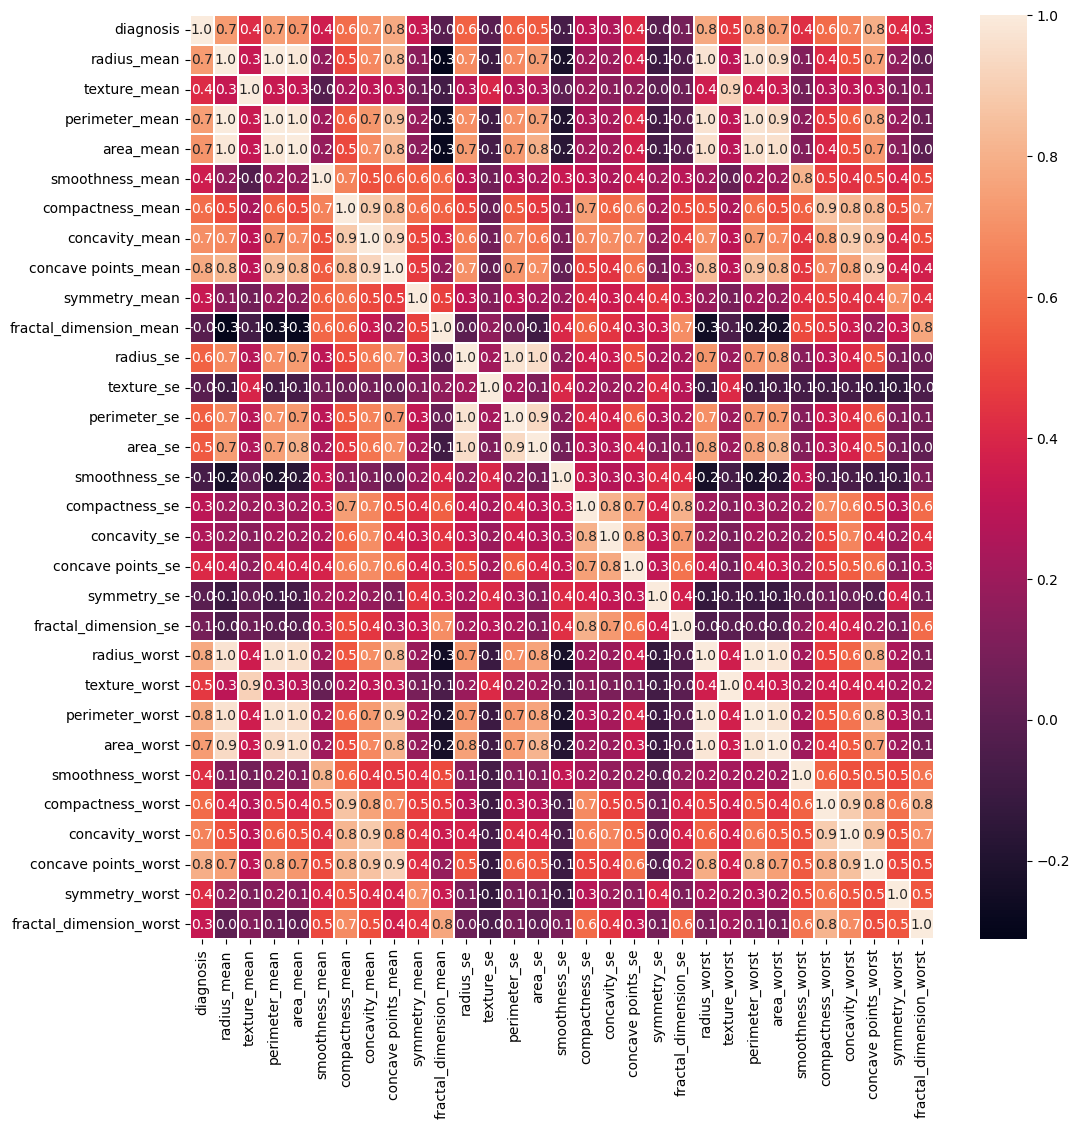

In [14]:
# Graficamos la correlación entre todas las variables mediante una matriz de correlación
# Graficamos solamente la variable Churn porque se tienen muchas variables

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_data_processing.corr(), annot=True, linewidths=0.1, fmt='.1f', ax=ax)

# Vemos que las variables area, radius, perimeter tienen una alta correlación entre sí.  tambíen concavity, compactness, concave points_mean
# y las siguientes variables.  Procederemos a eliminarlas para evitar la multicolinealidad, porque repercute en overfitting


# drop = ['radius_mean', 'perimeter_mean','texture_worst',   'texture_mean', 'radius_se', 'area_se', 'perimeter_worst', 'area_worst',
#        'radius_worst','concavity_worst', 'compactness_worst', 'compactness_mean', 'concavity_mean', 'concave points_mean',
#       'concavity_se', 'fractal_dimension_mean', 'smoothness_worst', 'compactness_se', 'concave points_worst',
#       'symmetry_mean', 'perimeter_se','fractal_dimension_se', 'area_mean']


In [16]:
# Borramos variables con alta correlación entre sí.

df_data_sel = df_data_processing.copy()

# Primero borramos todas las variables "worst"

drop = ['radius_worst',
        'texture_worst',
        'perimeter_worst',
        'area_worst',
        'smoothness_worst',
        'compactness_worst',
        'concavity_worst',
        'concave points_worst',
        'symmetry_worst',
        'fractal_dimension_worst']

df_data_sel = df_data_sel.drop(drop, axis=1)

# Borramos todas las variables "perimeter" y "area"

drop = ['perimeter_mean',
        'perimeter_se',
        'area_mean',
        'area_se']

df_data_sel = df_data_sel.drop(drop, axis=1)

# Por último borramos todas las variables "concavity" y "concave points"

drop = ['concavity_mean',
        'concavity_se',
        'concave points_mean',
        'concave points_se']

df_data_sel = df_data_sel.drop(drop, axis=1)

# vrificamos las variables, columnas resultantes.

df_data_sel.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

<Axes: >

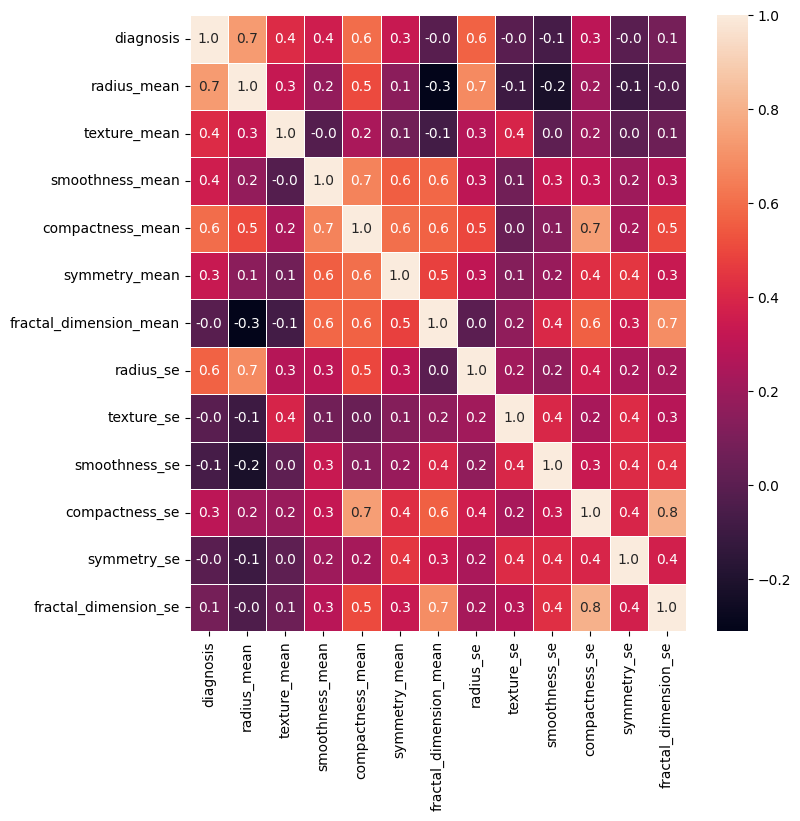

In [17]:
# Volvemos a graficar correlación mediante heatmap con las variables seleccionadas

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_data_sel.corr(), annot=True, linewidths=0.5, fmt='0.1f', ax=ax)

# Escalamiento de datos

In [18]:
scaler = MinMaxScaler() # definimos variable con función de scalamiento
df_data_sel_scaled = scaler.fit_transform(df_data_sel) # aplicamos escalamiento

# El resultado arroja un array o un tensor

df_data_sel_scaled

array([[1.        , 0.52103744, 0.0226581 , ..., 0.35139844, 0.31164518,
        0.18304244],
       [1.        , 0.64314449, 0.27257355, ..., 0.08132304, 0.08453875,
        0.0911101 ],
       [1.        , 0.60149557, 0.3902604 , ..., 0.2839547 , 0.20569032,
        0.12700551],
       ...,
       [1.        , 0.45525108, 0.62123774, ..., 0.26330099, 0.07454832,
        0.10354739],
       [1.        , 0.64456434, 0.66351031, ..., 0.44557936, 0.21610289,
        0.18276605],
       [0.        , 0.03686876, 0.50152181, ..., 0.01808514, 0.26563291,
        0.06523361]])

In [19]:
 # Convertimos tensor resultante del escalamiento, a un dataframe

 df_data_sel_scaled = pd.DataFrame(df_data_sel_scaled)

 df_data_sel_scaled.head()

 # El resultado arroja que se perdieron los encabezados de las columnas

0         1         2         3         4         5         6         7   \
0  1.0  0.521037  0.022658  0.593753  0.792037  0.686364  0.605518  0.356147   
1  1.0  0.643144  0.272574  0.289880  0.181768  0.379798  0.141323  0.156437   
2  1.0  0.601496  0.390260  0.514309  0.431017  0.509596  0.211247  0.229622   
3  1.0  0.210090  0.360839  0.811321  0.811361  0.776263  1.000000  0.139091   
4  1.0  0.629893  0.156578  0.430351  0.347893  0.378283  0.186816  0.233822   

         8         9         10        11        12  
0  0.120469  0.159296  0.351398  0.311645  0.183042  
1  0.082589  0.119387  0.081323  0.084539  0.091110  
2  0.094303  0.150831  0.283955  0.205690  0.127006  
3  0.175875  0.251453  0.543215  0.728148  0.287205  
4  0.093065  0.332359  0.167918  0.136179  0.145800

In [20]:
# Recuperamos nuevamente encabezados de las columnas, nombres desde el df_data_sel.

df_data_sel_scaled.columns = df_data_sel.columns

df_data_sel_scaled.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        1.0     0.521037      0.022658         0.593753          0.792037   
1        1.0     0.643144      0.272574         0.289880          0.181768   
2        1.0     0.601496      0.390260         0.514309          0.431017   
3        1.0     0.210090      0.360839         0.811321          0.811361   
4        1.0     0.629893      0.156578         0.430351          0.347893   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0       0.686364                0.605518   0.356147    0.120469   
1       0.379798                0.141323   0.156437    0.082589   
2       0.509596                0.211247   0.229622    0.094303   
3       0.776263                1.000000   0.139091    0.175875   
4       0.378283                0.186816   0.233822    0.093065   

   smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
0       0.159296        0.351398     0.311645              0.183042  
1       0.119387        0.081323     0.084539              0.091110  
2       0.150831        0.283955     0.205690              0.127006  
3       0.251453        0.543215     0.728148              0.287205  
4       0.332359        0.167918     0.136179              0.145800

# Análisis Exploratorio de datos

<Figure size 1000x800 with 0 Axes>

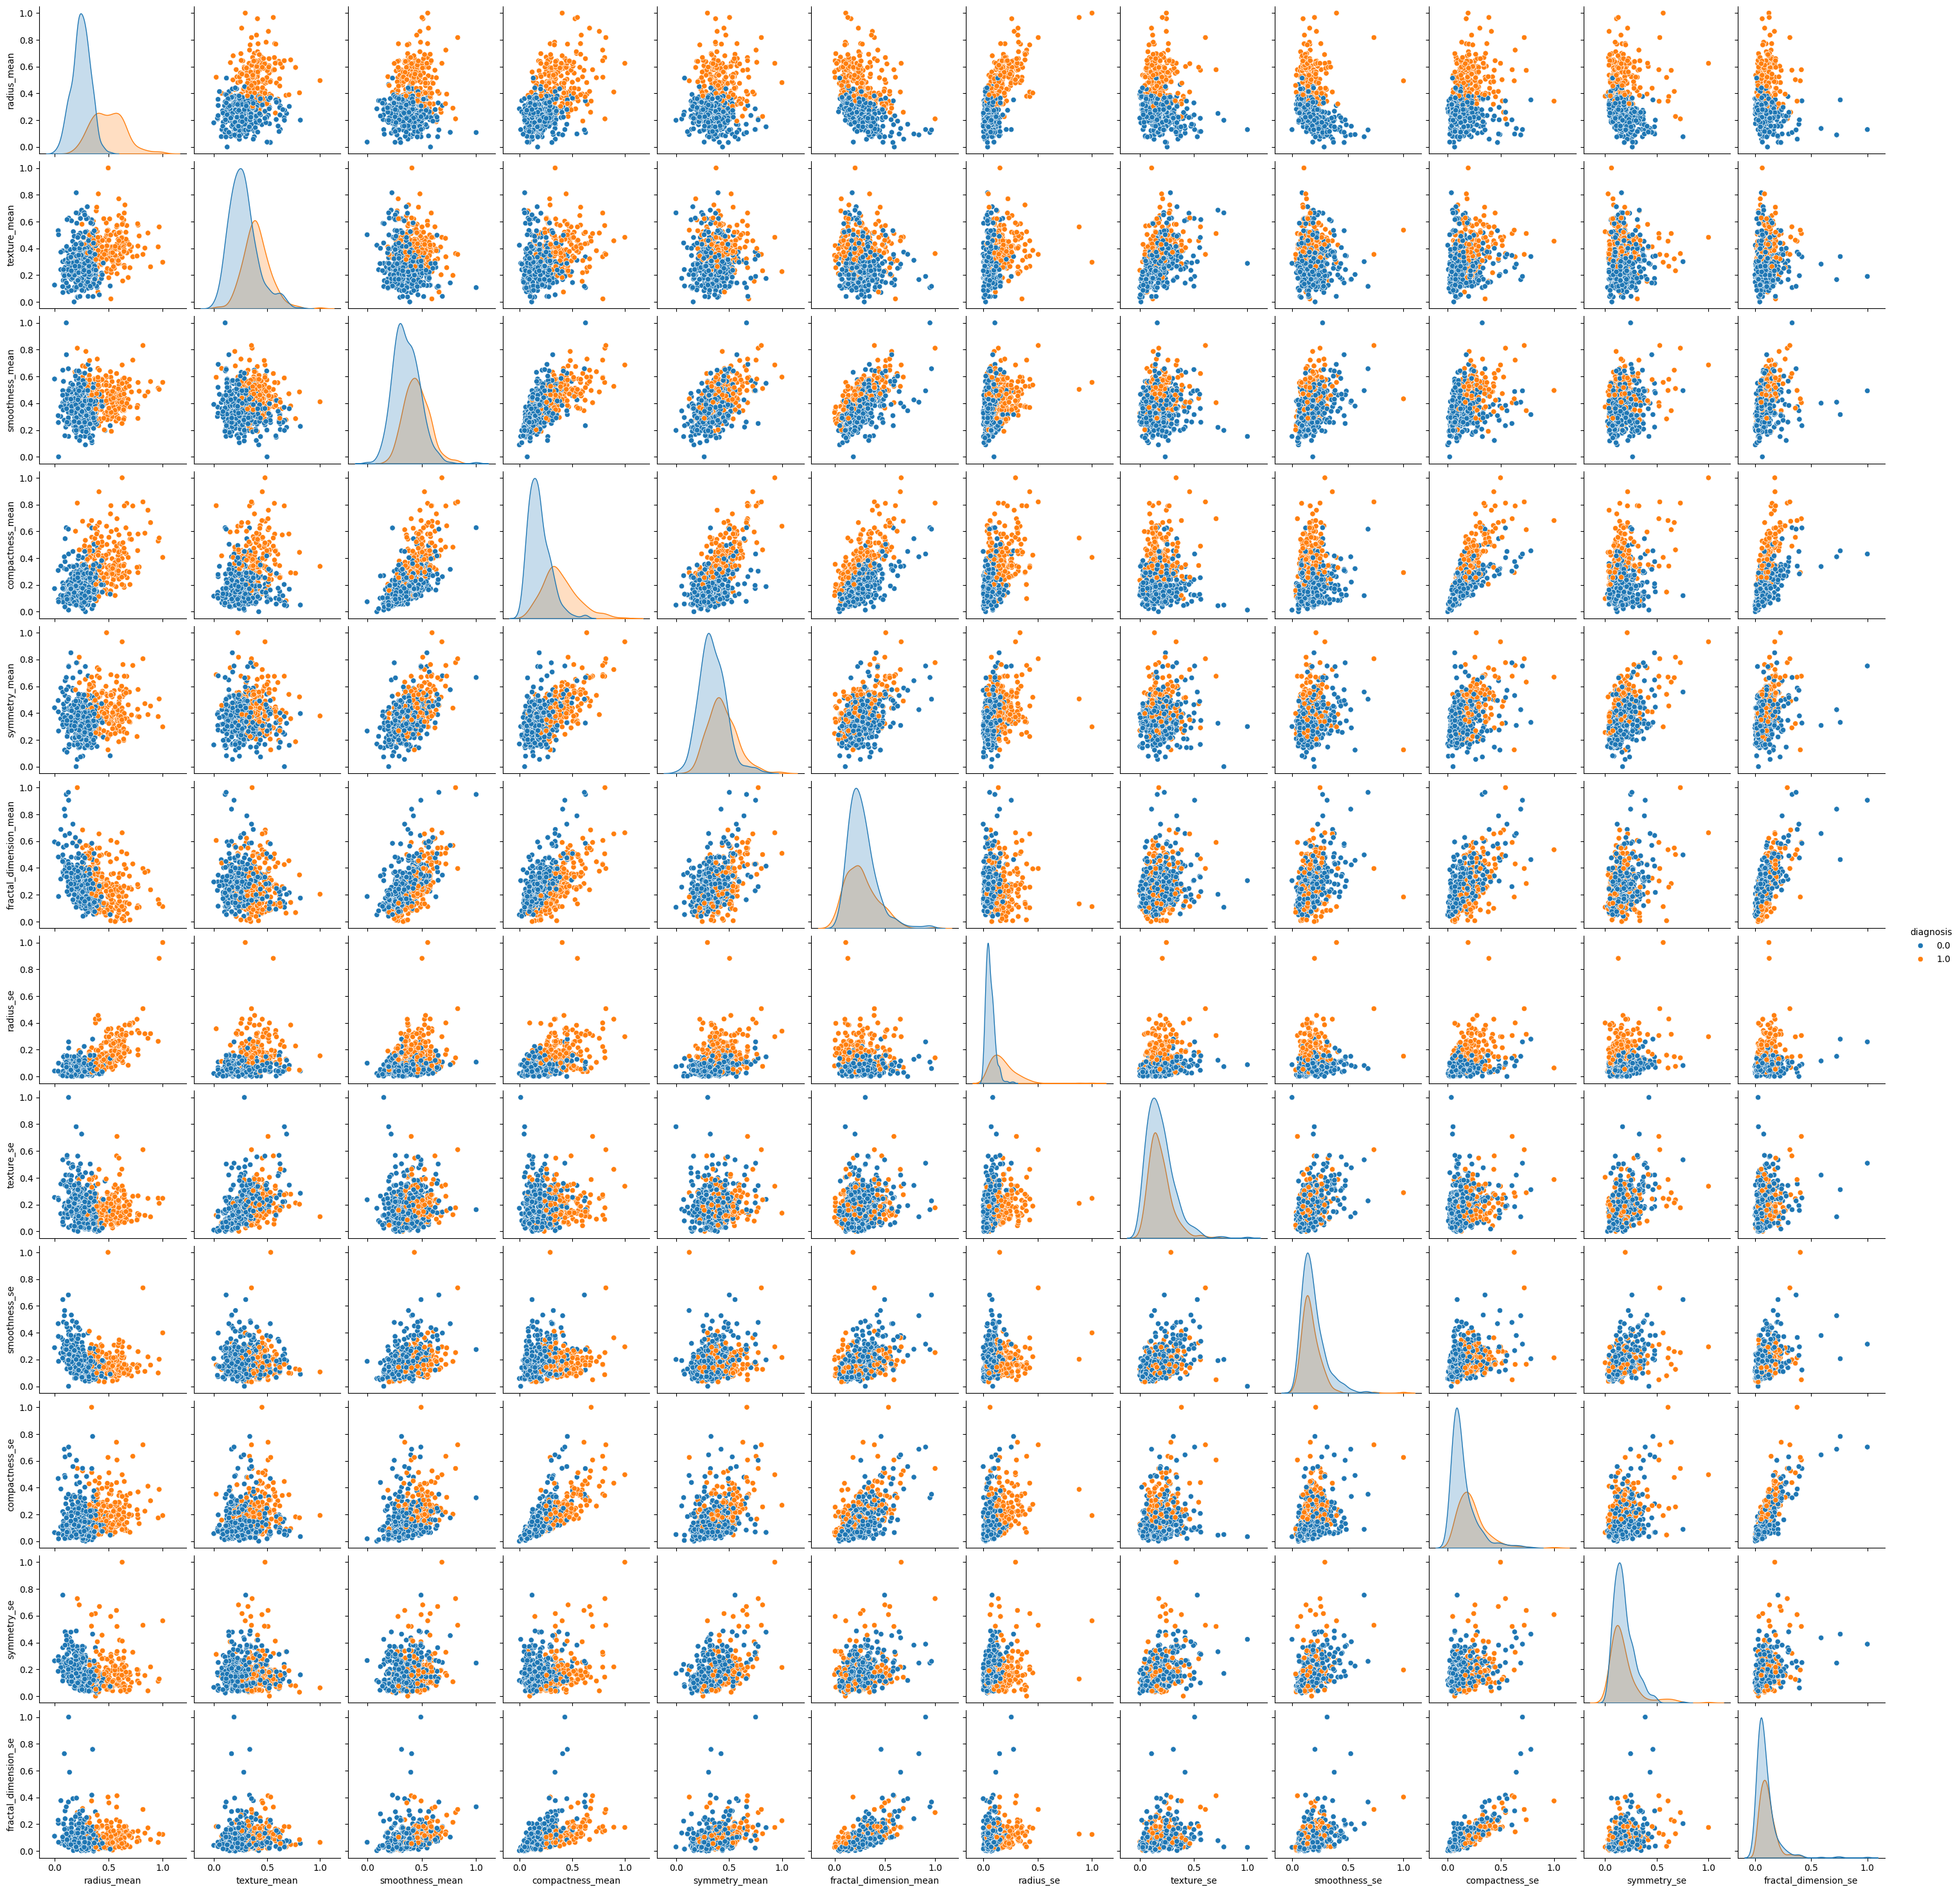

In [21]:
# Graficamos correlación de  las variables seleccionadas respecto a la variable diagnosis

fig = plt.figure(figsize=(10,8))

sns.pairplot(data=df_data_sel_scaled, hue='diagnosis')
plt.show()

# Análisis de resultado

#### Entre  mayor sea el radios_mean repercute en diagnosis=1

# Modelo de Regresión Logística

In [22]:
# Resolveremos el problema de clasificación binomial
# mediante solución al problema de clasificación binomial

# Separamos los datos de las variables dependientes y las independientes

x = df_data_sel_scaled.drop('diagnosis', axis=1)
y = df_data_sel_scaled['diagnosis'].values

In [23]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
x_train.shape

(398, 12)

In [26]:
x_test.shape

(171, 12)

In [27]:
model = LogisticRegression() # definimos variable con función de entrenamiento
result = model.fit(x_train, y_train)  # entrenaosmodel con datos de entrenamiento x_train, y_train

In [28]:
# Verificamos que lo arrojado por el entrenamiento estuvo bien o no...
#.. mediante una predicción con los datos de pureba x_test, y_test

prediction_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.935672514619883


In [29]:
# Evaluación del modelo

# Miramos las ventajas de entrenar un modelo mediante regresión logística

model.predict_proba(x_test)

# El resultado arroja una matriz, que dice que la probabilidad de que sea 0 es 0.60815828 y que sea 1 es 0.0.39184172,
# y así sucesivamente
# esto es una ventaja porque me dice que la predicción 0 o 1, sino también con qué probabilidad, porcentaje

array([[0.72484088, 0.27515912],
       [0.23565129, 0.76434871],
       [0.37317997, 0.62682003],
       [0.77667756, 0.22332244],
       [0.87416176, 0.12583824],
       [0.00714286, 0.99285714],
       [0.02681   , 0.97319   ],
       [0.4303751 , 0.5696249 ],
       [0.62567073, 0.37432927],
       [0.86935455, 0.13064545],
       [0.76258763, 0.23741237],
       [0.46136718, 0.53863282],
       [0.78360951, 0.21639049],
       [0.32070461, 0.67929539],
       [0.91739382, 0.08260618],
       [0.10444586, 0.89555414],
       [0.84281822, 0.15718178],
       [0.90581146, 0.09418854],
       [0.97259016, 0.02740984],
       [0.06062903, 0.93937097],
       [0.70263697, 0.29736303],
       [0.78658746, 0.21341254],
       [0.0254584 , 0.9745416 ],
       [0.94596502, 0.05403498],
       [0.85086713, 0.14913287],
       [0.66993929, 0.33006071],
       [0.86592447, 0.13407553],
       [0.85171834, 0.14828166],
       [0.80965563, 0.19034437],
       [0.11050453, 0.88949547],
       [0.

In [30]:
# Verificamos las ventajas con los coeficientes

model.coef_

# El resultado arroja datos + y -, indican la importancia que tienen los diferenes features para hacer la predicción-
# los resultaods positivos dicen cuales son los features que tienen mucha importancia para predecir cuando sea 1
# los resultaods negativos dicen cuales son los features que tienen mucha importancia para predecir cuando sea 0


array([[ 5.6233001 ,  2.8348479 ,  2.01858937,  3.42999781,  1.62962884,
        -0.97060537,  2.45355449, -0.4773407 , -0.48422525,  0.49762113,
        -0.46504916, -0.48572389]])

In [31]:
# Veamos la ventaja de los coeficientes con más detalle

model.feature_names_in_

# El resultado arroja todos los nombres de las variabes dependientes, features, que se usaron para predecir el diagnosis.

array(['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'], dtype=object)

Axes(0.125,0.11;0.775x0.77)


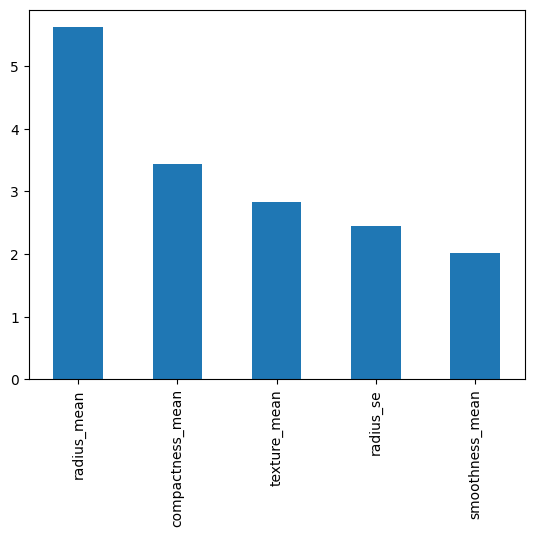

In [39]:
# Vamos a graficar estos resultados

weights = pd.Series(model.coef_[0], index=x.columns.values)
print(weights.sort_values(ascending=False)[:5].plot(kind='bar'))

# El resultado arroja que conlleva más al sí diagnosis = 1, las variables radius_mean y compactness_mean,
# Es dectir que estas dos variables tienen mucha importancia para el diagnosis

Axes(0.125,0.11;0.775x0.77)


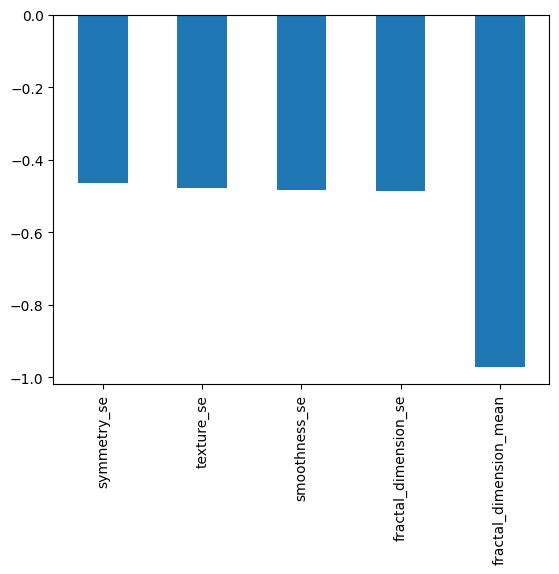

In [40]:
# Graficamos los valores negativos, que son las variables que me ayudan a predecir el no diagnosis = 0.

print(weights.sort_values(ascending=False)[-5:].plot(kind='bar'))

# la variable fractal_dimension_mean es la que más contribuye a que diagnosis = 0.

<Figure size 1100x1100 with 0 Axes>

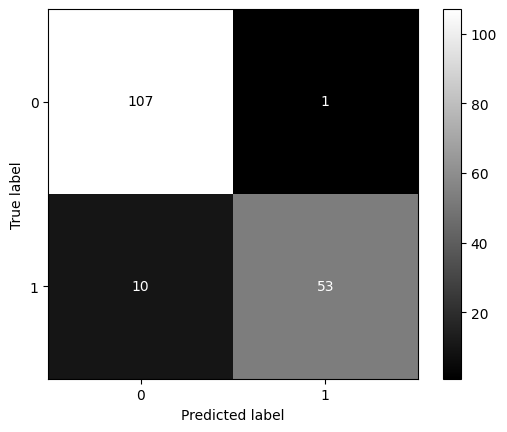

In [45]:
# Vamos a mirar la matriz de confusión para analizar el accuracy = exactitud

fig = plt.figure(figsize=(11,11))

cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.class_weight)
disp.plot(cmap='gray')
plt.show()

# la gráfica arroja que se tuvieron 107 aciertos o predicciones de diagnosis=0 cuando valor real era=0, y 53 aciertos de Churn=1 cuando valor real era=1.
# es decir la diagonal de la matriz hacia abajo indica los aciertos, y la diagonal hacia arriba indica los desaciertos.